In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load IMDb movie reviews dataset
num_words = 10000  # Consider only top 10,000 most frequent words
max_len = 200  # Maximum length of a review
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Preprocess the text data (padding)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Define a function to create the RNN model
def create_rnn_model(units=32, optimizer='adam', learning_rate=0.001):
    model = Sequential([
        Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
        SimpleRNN(units=units),
        Dense(1, activation='sigmoid')
    ])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define parameter grid for grid search
param_grid = {
    'units': [32, 64],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01]
}

best_score = 0
best_params = {}

# Perform grid search
for units in param_grid['units']:
    for optimizer in param_grid['optimizer']:
        for learning_rate in param_grid['learning_rate']:
            model = create_rnn_model(units=units, optimizer=optimizer, learning_rate=learning_rate)
            
            # Define callbacks
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
            
            # Train the model
            history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1, callbacks=[reduce_lr], verbose=0)
            
            # Evaluate the model on validation set
            val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
            
            print("Parameters: units={}, optimizer={}, learning_rate={}".format(units, optimizer, learning_rate))
            print("Validation Accuracy:", val_accuracy)
            
            # Update best score and parameters
            if val_accuracy > best_score:
                best_score = val_accuracy
                best_params['units'] = units
                best_params['optimizer'] = optimizer
                best_params['learning_rate'] = learning_rate

print("Best parameters:", best_params)
print("Best validation accuracy:", best_score)





Parameters: units=32, optimizer=adam, learning_rate=0.001
Validation Accuracy: 0.836080014705658
Parameters: units=32, optimizer=adam, learning_rate=0.01
Validation Accuracy: 0.6894800066947937
Parameters: units=32, optimizer=rmsprop, learning_rate=0.001
Validation Accuracy: 0.8373600244522095
Parameters: units=32, optimizer=rmsprop, learning_rate=0.01
Validation Accuracy: 0.7298399806022644
Parameters: units=64, optimizer=adam, learning_rate=0.001
Validation Accuracy: 0.806439995765686
Parameters: units=64, optimizer=adam, learning_rate=0.01
Validation Accuracy: 0.7134000062942505
Parameters: units=64, optimizer=rmsprop, learning_rate=0.001
Validation Accuracy: 0.8374800086021423
Parameters: units=64, optimizer=rmsprop, learning_rate=0.01
Validation Accuracy: 0.7248799800872803
Best parameters: {'units': 64, 'optimizer': 'rmsprop', 'learning_rate': 0.001}
Best validation accuracy: 0.8374800086021423


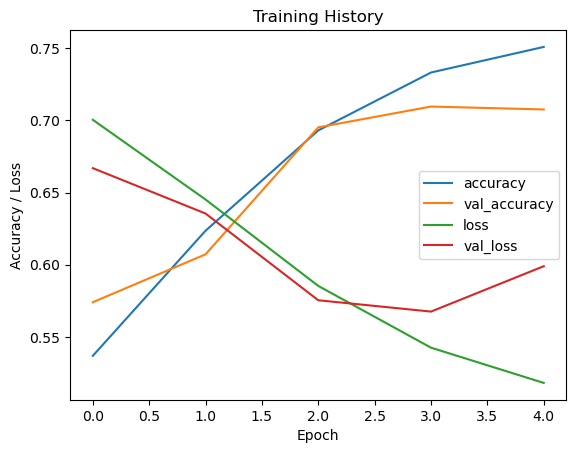

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()